<a href="https://colab.research.google.com/github/marc0pz/articulo__rtr/blob/main/clase2_aprox_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tendencias COVID-19
Naim Bro</br>
Diplomado Ciencia de Datos para la Política Pública</br>
Mayo 2021

En este código vamos a trabajar con datos de COVID-19, que vienen de la Universidad Johns Hopkins y del Ministerio de Ciencia de Chile. Revisaremos la evolución de contagios y muertes por país, y revisaremos la trayectoria de Chile por grupo etario.

In [1]:
#muchas de las liberías que vamos a usar vienen ya instaladas en colab; las que no, hay que instalar con el comando install.packages()
install.packages("gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
#cargamos las liberarías
library(tidyverse)
library(lubridate)
library(gridExtra)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [3]:
#cargamos los casos confirmados
#los datos vienen del Github del Center for Systems Science and Engineering (CSSE) at Johns Hopkins University
#https://github.com/CSSEGISandData/COVID-19

covid_confirmed <- read.csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")

covid_confirmed <- covid_confirmed %>%
  select(-(3:4))%>%
  pivot_longer(-(1:2), names_to = "fecha", values_to = "casos")

#convertimos las fechas a formato "date" con lubridate
covid_confirmed$fecha <- gsub("X", "", covid_confirmed$fecha)
covid_confirmed$fecha <- mdy(covid_confirmed$fecha)

#mdy significa month-day-year. ¿Qué combinación de letras usarías si tus fechas vienen en formato año, mes, y día?

#para algunos países, los datos vienen desagregados por región/provincia. Reagrupamos por país.
covid_confirmed <- covid_confirmed %>%
  group_by(Country.Region, fecha)%>%
  summarise(casos_pais = sum(casos))
colnames(covid_confirmed)[1] <- "pais"

`summarise()` has grouped output by 'Country.Region'. You can override using the `.groups` argument.



In [4]:
#cargamos poblacion, hacemos combinamos tablas con _join, y calculamos casos x millon de habitantes
pop_tbl <- read.csv("https://gist.githubusercontent.com/curran/0ac4077c7fc6390f5dd33bf5c06cb5ff/raw/605c54080c7a93a417a3cea93fd52e7550e76500/UN_Population_2019.csv")
pop_tbl <- pop_tbl %>% select("Country", "X2020")
colnames(pop_tbl) <- c('pais', 'pop')
pop_tbl[pop_tbl$pais == "United States of America", "pais"] <- "US"
covid_confirmed <- left_join(covid_confirmed, pop_tbl, by = "pais")
covid_confirmed$casos_millon <- (covid_confirmed$casos_pais / covid_confirmed$pop)*1000000

In [5]:
#lee la tabla que está en https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
# y guárdala bajo "covid_deaths"



#pasamos la tabla de "ancha" a "larga". Esto es necesario para los paquetes de tidyverse



#limpiamos las fechas, sacándoles las "X", y las convertimos a formato "date" usando lubridate



#para algunos países, los datos vienen desagregados por región/provincia. Reagrupa por país. 



#Cambia el nombre de tu primera columna a "pais" (sigue el formato de los datos para contagio)


# imprime las primeras filas de la tabla resultante usando la función head()

In [ ]:
# RESPUESTAS EJERCICIO MARCO PAVEZ #

#1) 

covid_deaths <- read.csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")

covid_deaths

??pivot_longer

covid_deaths <- covid_deaths %>%
  select(-(3:4))%>%
  pivot_longer(-(1:2), names_to = "fecha", values_to = "casos")       # al parecer names_to se aplica en caso de que variables sean integer y values_to el conjunto de observaciones respecto a names_to

covid_deaths$fecha <- gsub("X", "", covid_deaths$fecha)
covid_deaths$fecha <- mdy(covid_deaths$fecha)


In [ ]:
covid_deaths

In [ ]:
####RESPUESTAS DEL EJERCICIO ANTERIOR####

#cargamos datos de muertes
covid_deaths <- read.csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")

#pasamos la tabla de "ancha" a "larga". Esto es necesario para los paquetes de tidyverse
covid_deaths <- covid_deaths %>%
  select(-(3:4))%>%
  pivot_longer(-(1:2), names_to = "fecha", values_to = "casos")

#convertimos las fechas a formato "date" usando lubridate
covid_deaths$fecha <- gsub("X", "", covid_deaths$fecha)
covid_deaths$fecha <- mdy(covid_deaths$fecha)

#para algunos países, los datos vienen desagregados por región/provincia. Agrupamos por país para trabajar en un solo nivel de agregación. 
covid_deaths <- covid_deaths %>%
  group_by(Country.Region, fecha)%>%
  summarise(muertes_pais = sum(casos))
colnames(covid_deaths)[1] <- "pais"

covid_deaths <- left_join(covid_deaths, pop_tbl, by = "pais")
covid_deaths$casos_millon <- (covid_deaths$muertes_pais / covid_deaths$pop)*1000000

tail(covid_deaths)

`summarise()` has grouped output by 'Country.Region'. You can override using the `.groups` argument.



pais,fecha,muertes_pais,pop,casos_millon
<chr>,<date>,<int>,<int>,<dbl>
Zimbabwe,2021-05-22,1586,14863,106707.9
Zimbabwe,2021-05-23,1586,14863,106707.9
Zimbabwe,2021-05-24,1586,14863,106707.9
Zimbabwe,2021-05-25,1587,14863,106775.2
Zimbabwe,2021-05-26,1589,14863,106909.8
Zimbabwe,2021-05-27,1592,14863,107111.6


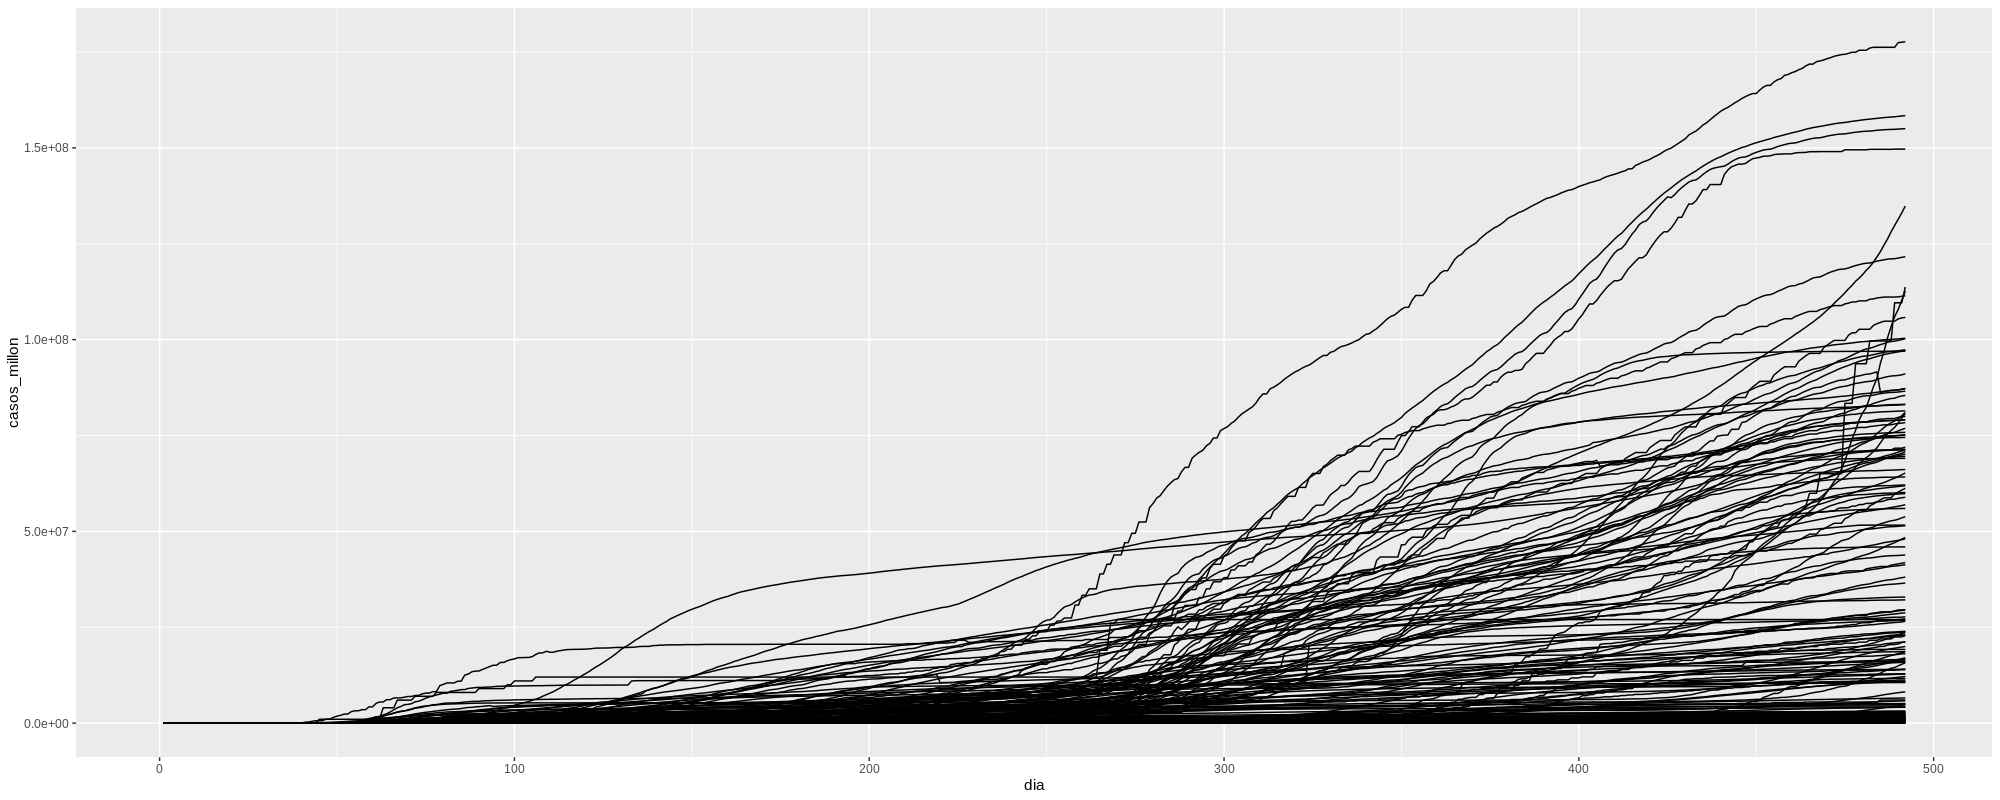

In [ ]:
## Plot 1: contagios por país
covid_estandarizado <- covid_confirmed %>%
  group_by(pais) %>%
  mutate(dia = 1:n())%>%
  drop_na()

ggplot(covid_estandarizado, aes(dia, casos_millon, group = pais)) +
geom_path()

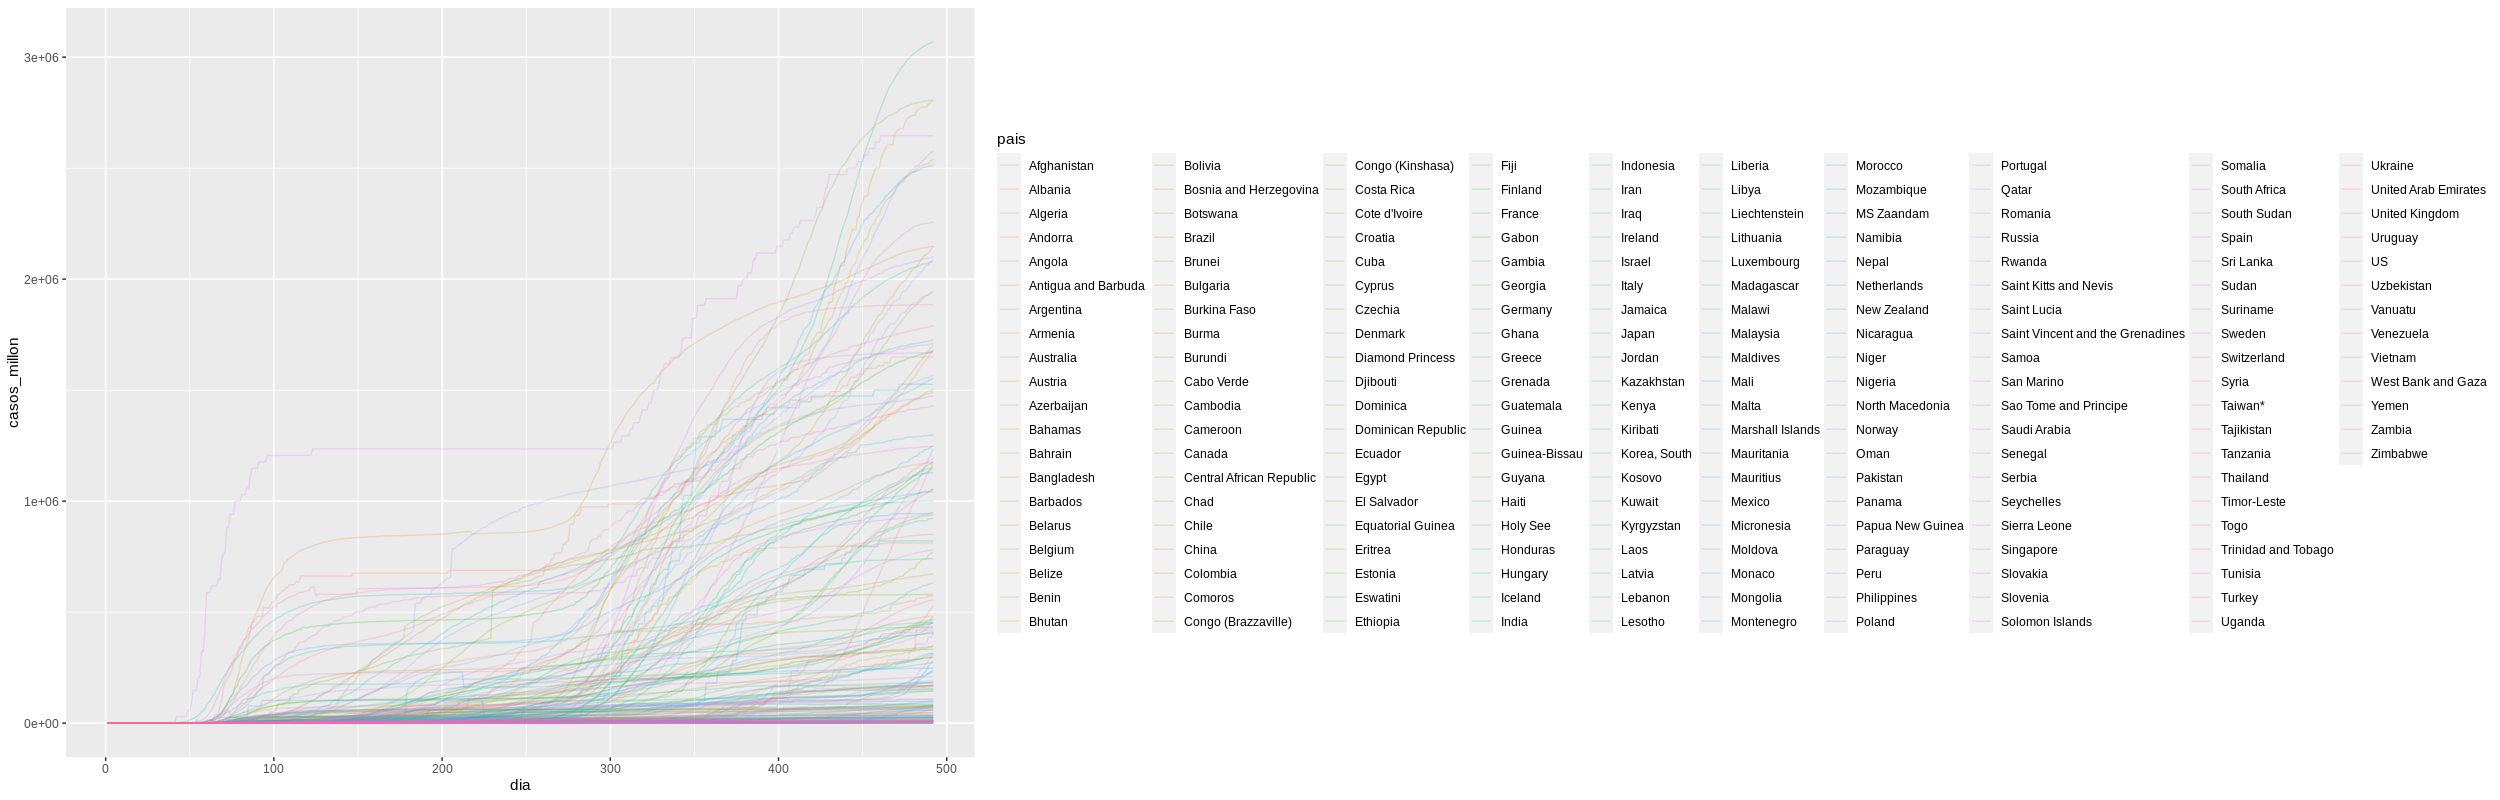

In [ ]:
options(repr.plot.width = 25, repr.plot.height = 8, repr.plot.res = 100, warn=-1)

# Plot 2: muertes por país
covid_estandarizado_d <- covid_deaths %>%
  group_by(pais) %>%
  mutate(dia = 1:n())

#Ejercicio: cambia el alpha dentro de geom_path para cambiar la transparencia de las líneas (alpha va de 0 a 1)
ggplot(covid_estandarizado_d, aes(dia, casos_millon, color = pais))+
  geom_path(alpha = 0.2)

In [ ]:
## Plot 2: casos acumulados versus nuevos
pais_etiqueta <- c("Chile", "Serbia","Israel")
dias_atras <- 7
casos_c <- 100
covid_atemporal <-  covid_confirmed %>%
  filter(pop > 1000)%>%
  group_by(pais)%>%
  mutate(casos_ac_minus = c(rep(NA, dias_atras), casos_pais[1:(length(casos_pais)-dias_atras)]))%>%
  mutate(casos_new = casos_pais - casos_ac_minus)%>%
  filter(casos_pais > casos_c)

plot_atemporal_confirmed <- ggplot(covid_atemporal, aes(casos_pais, casos_new, group = pais))+
  geom_path(alpha = 0.1, size = 1)+
  geom_path(data = covid_atemporal %>% filter(pais %in% pais_etiqueta), aes(casos_pais, casos_new, colour = pais), size = 1.5)+
  geom_path(data = covid_atemporal %>% filter(pais %in% "Chile"), aes(casos_pais, casos_new, colour = pais), size = 2)+
  guides(color=FALSE)+
  geom_text(data = covid_atemporal %>% filter(pais %in% pais_etiqueta) %>% group_by(pais) %>% mutate(casos_ac_last = last(casos_pais), casos_new_last = last(casos_new)), aes(casos_ac_last, casos_new_last,label = pais), color = "black", size = 5)+
  scale_y_log10()+
  scale_x_log10()+
  labs(title = paste("Contagios acumulados versus nuevos en los ultimos", dias_atras, "dias"), 
       x = paste("Casos acumulados hasta el dia",Sys.Date()), 
       y = paste("Casos nuevos desde",(Sys.Date()-dias_atras)))
  
casos_d <- 10
covid_atemporal <-  covid_deaths %>%
  filter(pop > 1000)%>%
  group_by(pais)%>%
  mutate(casos_ac_minus = c(rep(NA, dias_atras), muertes_pais[1:(length(muertes_pais)-dias_atras)]))%>%
  mutate(casos_new = muertes_pais - casos_ac_minus)%>%
  filter(muertes_pais > casos_d)

plot_atemporal_deaths <- ggplot(covid_atemporal, aes(muertes_pais, casos_new, group = pais))+
  geom_path(alpha = 0.1, size = 1)+
  geom_path(data = covid_atemporal %>% filter(pais %in% pais_etiqueta), aes(muertes_pais, casos_new, colour = pais), size = 1.5)+
  geom_path(data = covid_atemporal %>% filter(pais %in% "Chile"), aes(muertes_pais, casos_new, colour = pais), size = 2)+
  #guides(color=FALSE)+
  geom_text(data = covid_atemporal %>% filter(pais %in% pais_etiqueta) %>% group_by(pais) %>% mutate(casos_ac_last = last(muertes_pais), casos_new_last = last(casos_new)), aes(casos_ac_last, casos_new_last,label = pais), color = "black", size = 5)+
  scale_y_log10()+
  scale_x_log10()+
  labs(title = paste("Casos de muerte acumulados versus nuevos en los ultimos", dias_atras, "dias"), 
       x = paste("Casos acumulados hasta el dia",Sys.Date(), "(log)"), 
       y = paste("Casos nuevos desde",(Sys.Date()-dias_atras), "(log)"))

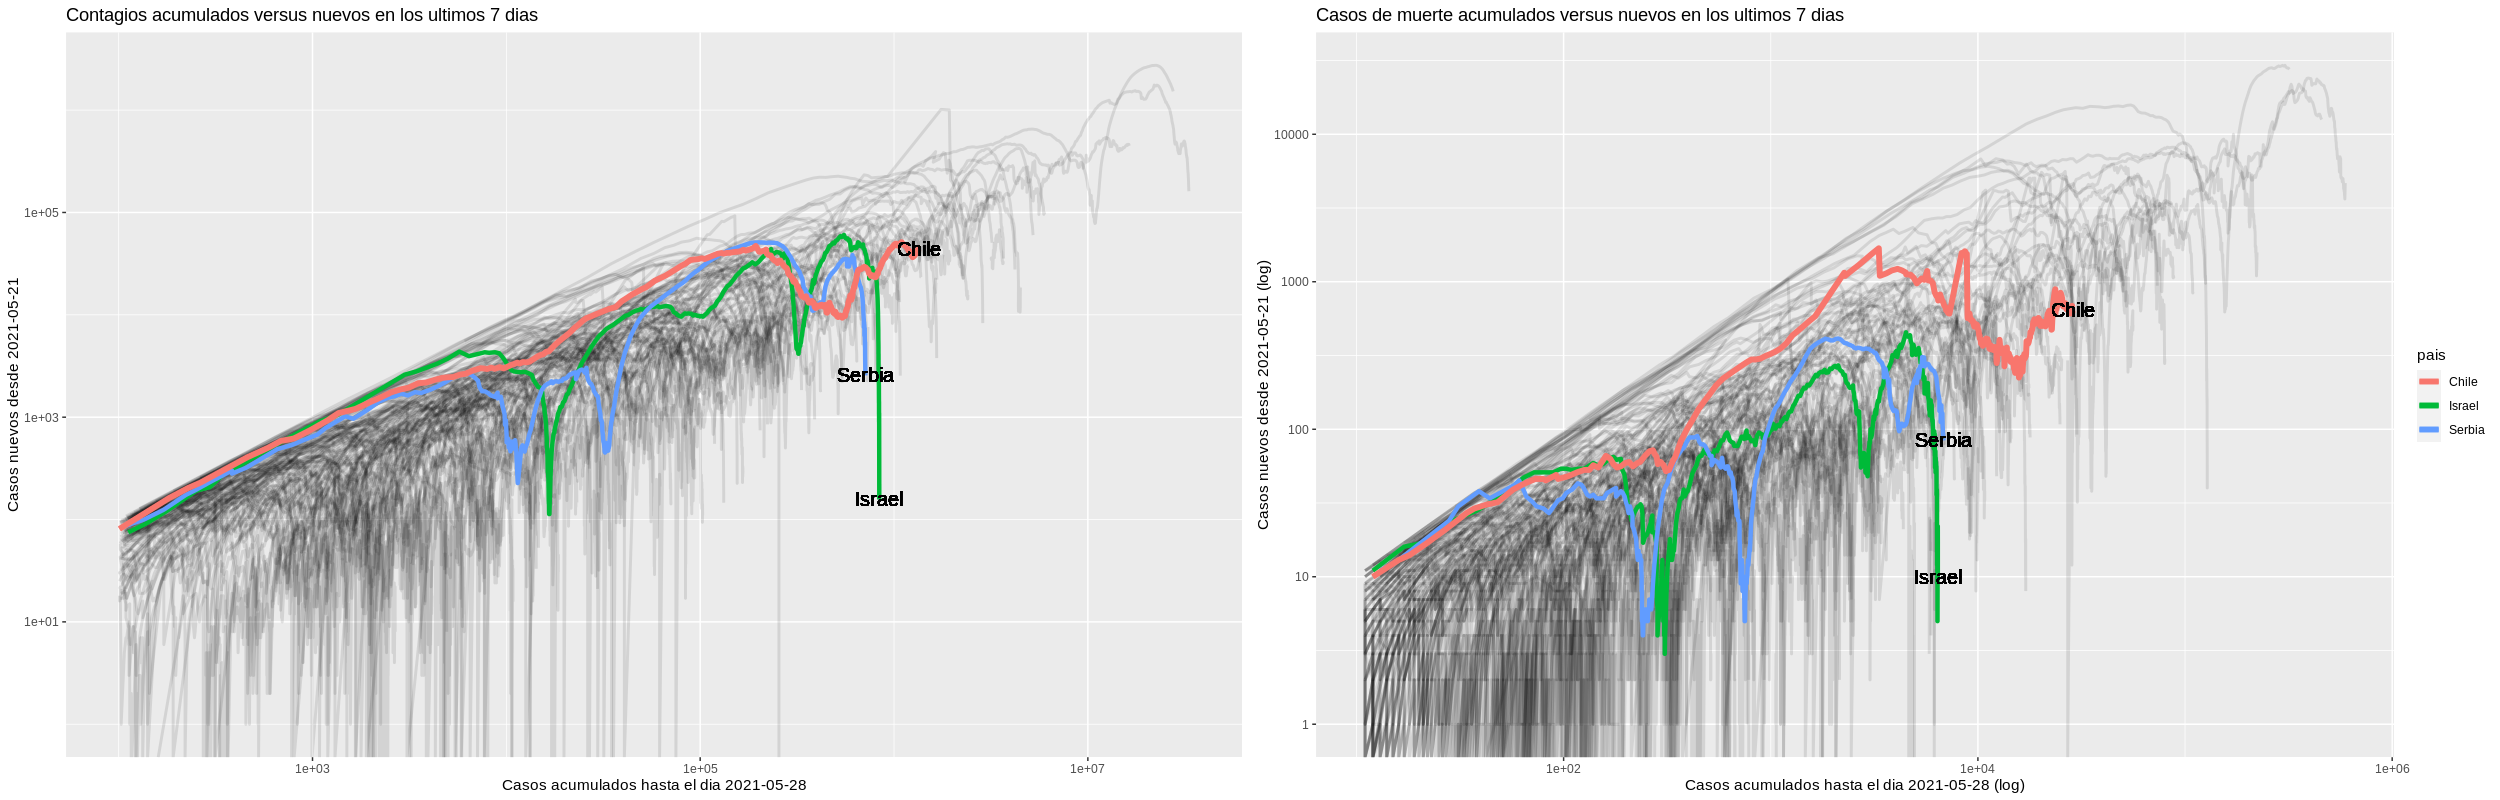

In [ ]:
options(repr.plot.width = 25, repr.plot.height = 8, repr.plot.res = 100, warn=-1)

grid.arrange(plot_atemporal_confirmed, plot_atemporal_deaths, nrow = 1)

In [ ]:
# EJERCICIO:

dias_atras <- 7

df_plot <- covid_deaths %>%
  filter(pop > 10000)%>%
  group_by(pais)%>%
  mutate(casos_ac_minus = c(rep(NA, dias_atras), muertes_pais[1:(length(muertes_pais)-dias_atras)]))%>%
  mutate(casos_new = muertes_pais - casos_ac_minus)%>%
  filter(muertes_pais > casos_d)%>%
  arrange(fecha)

# imprime las primeras líneas de la tabla df_plot ¿qué columnas tiene?


In [ ]:
# Usa la función ggplot() para graficar el objeto que creamos arriba, "df_plot"
# dentro del argumento aes introduce las columnas que servirán de eje X y eje Y
# acuérdate que tienes que agrupar los datos por país; para eso, usa el argumento "group" dentro de aes
# agrega una capa para indicar qué tipo de gráfico es. Para series de tiempo como esta, geom_path es la que más te puede servir
# cambia el argumento group por color, y  mira qué pasa
# dentro de geom_path, agrega un argumento size y dale valores entre 1 a 10



### Muertes por grupo etario en Chile (¿funciona la vacuna?)

`summarise()` has grouped output by 'Grupo.de.edad'. You can override using the `.groups` argument.



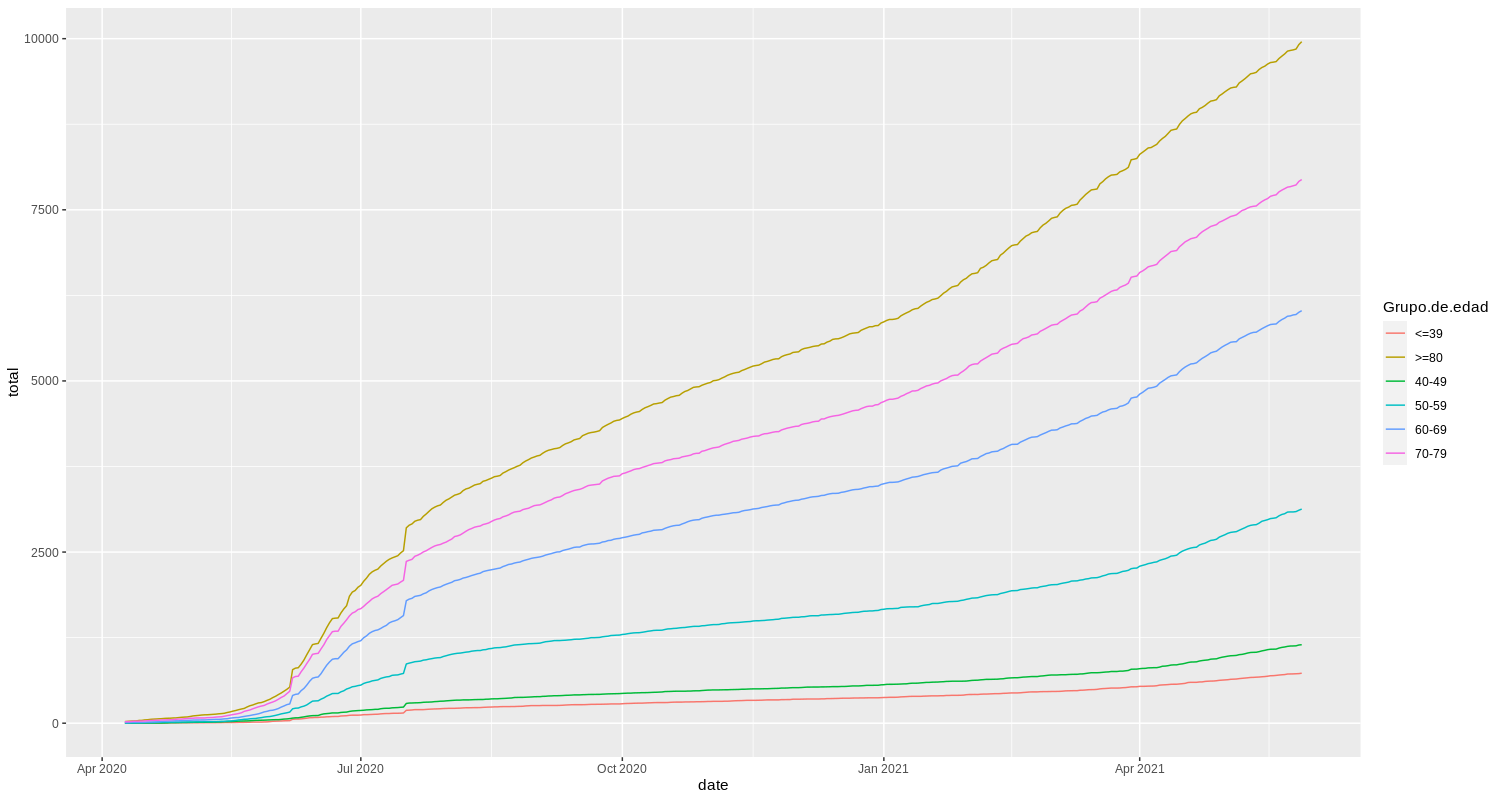

In [ ]:
#trabajamos con datos del Ministerio de Ciencia de Chile
#https://github.com/MinCiencia/Datos-COVID19
options(repr.plot.width = 15, repr.plot.height = 8, repr.plot.res = 100, warn=-1)

covid_etario <- read.table(file = 'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto10/FallecidosEtario.csv', 
                             sep = ',', header = T, quote = '', encoding = 'UTF-8', stringsAsFactors = F)

covid_etario <- pivot_longer(covid_etario, 2:ncol(covid_etario), 
                             names_to = "date", values_to = "total_cases")
covid_etario$date <- gsub("X", "", covid_etario$date)
covid_etario$date <- ymd(covid_etario$date)

covid_etario$Grupo.de.edad <- ifelse(covid_etario$Grupo.de.edad %in% c('80-89','>=90'), '>=80', covid_etario$Grupo.de.edad)
covid_etario <- covid_etario %>%
  group_by(Grupo.de.edad, date)%>%
  summarise(total = sum(total_cases))

ggplot(covid_etario, aes(date, total, color = Grupo.de.edad))+
  geom_path()

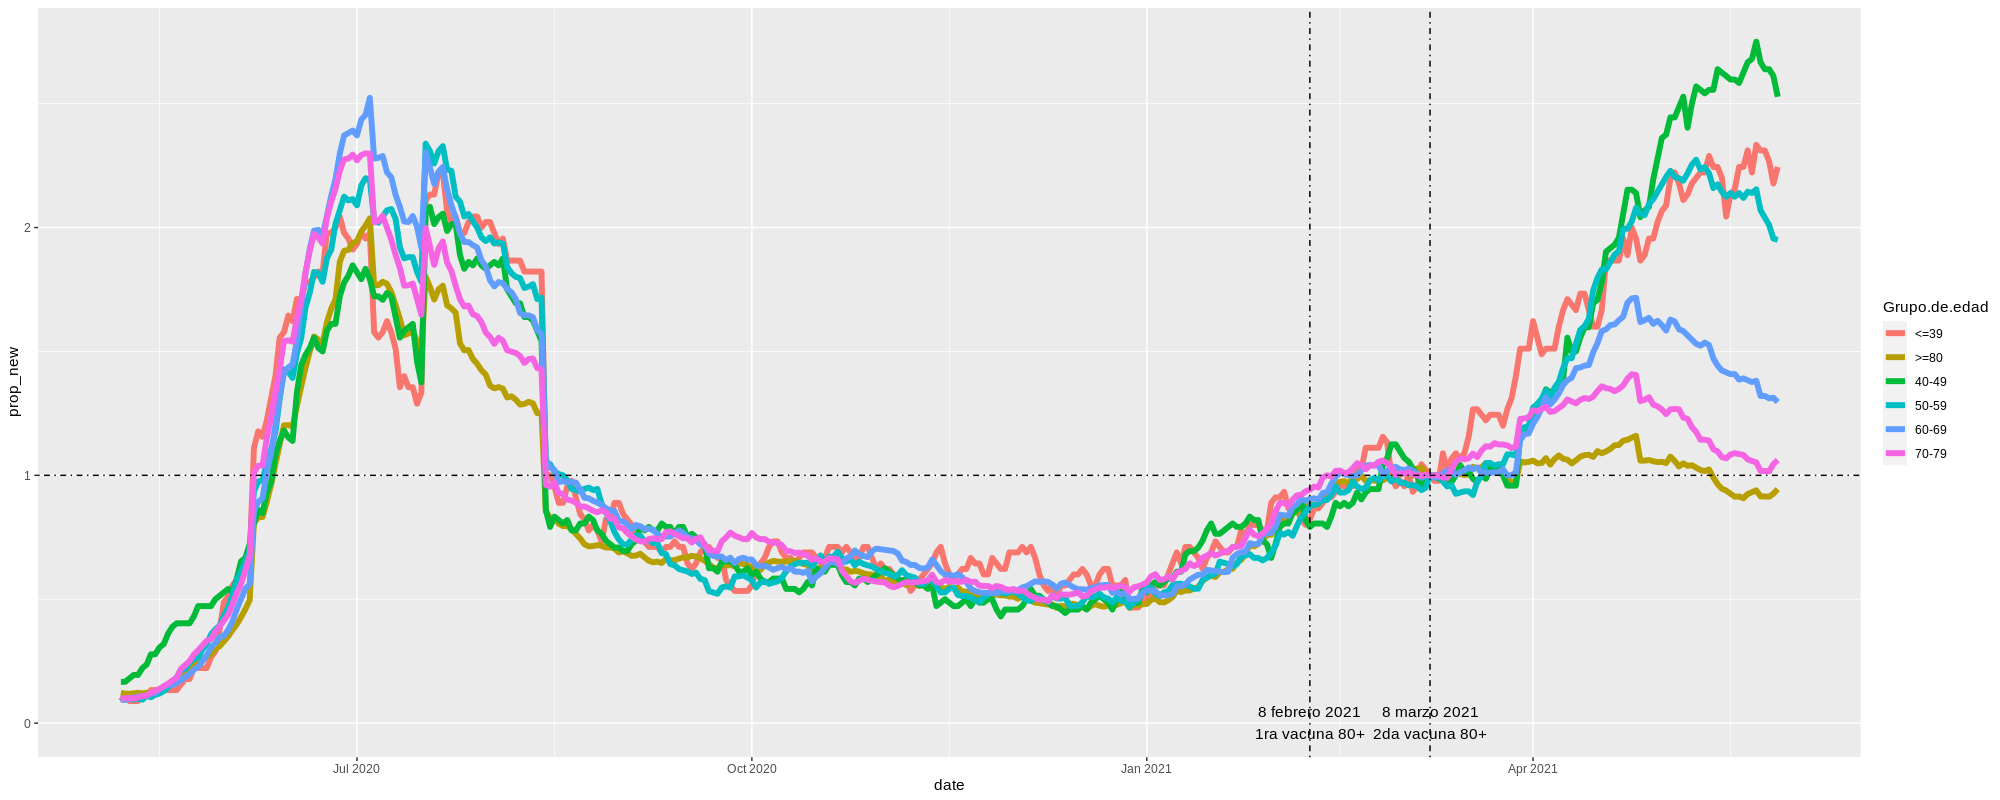

In [ ]:
# columna de opinión 20-05-2021 sobre nuevas variantes y necesidad de acelerar vacunación: 
# https://www.nytimes.com/2021/05/28/opinion/covid-vaccine-variants.html
# datos de vacunación por paíse: https://ourworldindata.org/covid-vaccinations

options(repr.plot.width = 20, repr.plot.height = 8, repr.plot.res = 100, warn=-1)

dias_atras <- 28
covid_etario <- covid_etario %>%
  group_by(Grupo.de.edad)%>%
  mutate(total_minus = c(rep(NA, dias_atras), total[1:(length(total)-dias_atras)]))%>%
  mutate(total_new = total - total_minus)

ref_date <- ymd("2021-03-08")
covid_etario_plot <- covid_etario %>%
  group_by(Grupo.de.edad)%>%
  mutate(ref_date_new = total_new[date == ref_date])%>%
  ungroup()%>%
  mutate(prop_new = total_new/ref_date_new)%>%
  drop_na()

vline <- c(ymd("2021-02-08"), ymd("2021-03-08"))
ggplot(covid_etario_plot, aes(date, prop_new, color = Grupo.de.edad))+
  geom_path(size = 2)+
  # geom_smooth(method = 'gam', se = F)+ 
  geom_vline(xintercept= vline, linetype="dotdash")+
  geom_hline(yintercept = 1, linetype = "dotdash")+
  annotate("text", x = vline, y = 0, label = c('8 febrero 2021\n1ra vacuna 80+', '8 marzo 2021\n2da vacuna 80+'))